In [9]:
from snn_delays.datasets.custom_datasets import CustomDataset
from snn_delays.config import DATASET_PATH
from torch.utils.data import DataLoader
import os

from tonic import MemoryCachedDataset
import numpy as np

'''
4-word classification dataset (permuted without repetition)

in total, 24 classes

words = [
    "ABCD", "ABDC", "ACBD", "ACDB", "ADBC", "ADCB",
    "BACD", "BADC", "BCAD", "BCDA", "BDAC", "BDCA",
    "CABD", "CADB", "CBAD", "CBDA", "CDAB", "CDBA",
    "DABC", "DACB", "DBAC", "DBCA", "DCAB", "DCBA"
]

'''

#data = np.load(os.path.join(DATASET_PATH, 'raw_datasets', 'Letters', 'letter_classification_dataset.npz'))
data = np.load(os.path.join(DATASET_PATH, 'Letters', 'four_letter_classification_dataset.npz'))

train_data = data['train_data']
test_data = data['test_data']
train_labels= data['train_labels']
test_labels = data['test_labels']

num_samples = len(train_labels)

train_dataset = CustomDataset(train_data, train_labels)
test_dataset = CustomDataset(test_data, test_labels)

dataset_dict = train_dataset.get_train_attributes()

cached_train_dataset = MemoryCachedDataset(train_dataset)
cached_test_dataset = MemoryCachedDataset(test_dataset)

total_time = train_data.shape[1]
print(f'num timesteps per sample: {total_time}')
batch_size = 128

train_loader = DataLoader(cached_train_dataset,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False,
                            pin_memory=True,
                            num_workers=0)

test_loader = DataLoader(cached_test_dataset,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False,
                            pin_memory=True,
                            num_workers=0)

dataset_dict["time_ms"] = 1e3
dataset_dict["dataset_name"] = "letters"

print(dataset_dict)

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

num timesteps per sample: 64
{'num_input': 25, 'num_training_samples': 9600, 'num_output': 24, 'time_ms': 1000.0, 'dataset_name': 'letters'}
torch.Size([128, 64, 1, 25])
torch.Size([128, 24])


In [10]:
sample = img[0].cpu().numpy()
print(sample)

[[[1. 0. 1. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 1. 0. ... 1. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]


In [11]:
reference = lbl[0].cpu().numpy()
print(reference)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


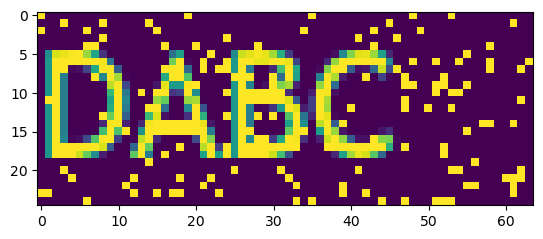

In [12]:
import matplotlib.pyplot as plt
plt.imshow(sample[:, 0, :].T)